# Определение перспективного тарифа для телеком-компании

## Описание проекта
Заказчик - «Мегалайн» — федеральноый оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

### Описание тарифов
*Тариф «Смарт»*

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 
1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 
2. сообщение: 3 рубля; 
3. 1 Гб интернет-трафика: 200 рублей.
*Тариф «Ультра»*

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 
1. минута разговора: 1 рубль; 
2. сообщение: 1 рубль; 
3. 1 Гб интернет-трафика: 150 рублей.


*Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.*

### Цель проекта
Проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Объект исследования

Представлена небольшая выборка клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

### Файлы для работы: 
- `/datasets/calls.csv` - информация о звонках
- `/datasets/internet.csv` - информация об интернет-сессиях
- `/datasets/messages.csv` - информация о сообщениях
- `/datasets/tariffs.csv` - информация о тарифах
- `/datasets/users.csv` - информация о пользователях

### Задачи проекта:

Определить для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Описать поведение клиентов оператора, исходя из выборки:
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Определить среднее количество, дисперсию и стандартное отклонение. 
- Построить гистограммы. 
- Описать распределения.

Проверить гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**План исследования**

- [2. Обзор данных](#section_2)
- [3. Предобработка данных](#section_3)
- [4. Анализ данных](#section_4)
    - [Группировка данных](#section_4_1)
    - [Объединение данных](#section_4_2)
    - [Построение гистограмм](#section_4_3)
    - [Определение выручки от абонента](#section_4_4)
    - [Проверка гипотез](#section_4_5)
- [5. Общие Выводы](#section_5)


<a id='section_2'></a>
## Обзор данных

Импортируем `pandas`

In [3]:
import pandas as pd

Успешно. Прочитаем и выведем на экран информацию о звонках

In [4]:
df_calls = pd.read_csv('/datasets/calls.csv')

In [5]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Файл прочитался без ошибок. В нем 202607 записей, без пропусков. Посмотрим первый записи таблицы.

In [6]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Согласно представленной информации в таблице следующая информация:
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

Указано, что 0 в длительности звонка - это пропущенный звонок.

 Прочитаем и выведем информацию об интернет-сессиях:

In [7]:
df_internet = pd.read_csv('/datasets/internet.csv')

In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Файл прочитался без ошибок. В нем 149396 записей, без пропусков. Выведем первые 5 строк.

In [9]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Как и в прошлой таблице, даты имеют строковый тип. Наметим преобразовать его в предобработке. 

Согласно представленной информации в таблице следующая информация:
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id`— идентификатор пользователя

В таблице предствален недокументированный столбец `	Unnamed: 0` . Возможно просто дублируется индекс датафрейма. Проверим на предобработке и при необходимости удалим.

Выведем информацию о сообщениях:

In [10]:
df_messages = pd.read_csv('/datasets/messages.csv')

In [11]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Файл также прочитался без ошибок. В нем 123036 записей, без пропусков. Выведем первые строки

In [12]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Опять даты. Согласно документации:
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

Прочитаем информацию о тарифах

In [13]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [14]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Здесь также без неожиданностей.  Выведем весь фрейм

In [15]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Согласно описанию: 

- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Теперь выведем информацию о пользователях

In [16]:
df_users = pd.read_csv('/datasets/users.csv')

In [17]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Здесь уже есть пропуски. С ними разберёмся на этапе предобработки. Выведем первые строки

In [18]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Согласно описанию:
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tarif` — название тарифного плана

### Выводы

Файлы прочитались без ошибок. Пропуски обнаружены только в файле с пользователями. Даты указаны как `object`. Лучше будет их пробразовать в `datetime` для удобства работы. Подозрительный столбец в таблице с интернет-сессиями. Возможно от него избавимся.

<a id='section_3'></a>
## Предобработка данных

Для начала попробуем проверить предположение, что столбец `Unnamed: 0` дублирует индекс датафрейма `df_internet`

In [19]:
sum(df_internet['Unnamed: 0'] == df_internet.index)

149396

Значение суммы соответствует длине фрейма. Учитывая, что True обрабатывается как единица, можем утверждать, что `Unnamed: 0` дублирует индекс датафрейма `df_internet`. Удалим столбец.

In [20]:
df_internet = df_internet.drop('Unnamed: 0', axis=1)

In [21]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Удаление вышло. Теперь преобразуем даты в тип `datetime`

In [22]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = ('%Y-%m-%d'))

In [23]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Вышло. Аналогично поступим для интернет - сессий

In [24]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = ('%Y-%m-%d'))

In [25]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Вышло. Аналогично для сообщений

In [26]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = ('%Y-%m-%d'))

In [27]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Аналогично для пользователей.

In [28]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = ('%Y-%m-%d'))

In [29]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Пропуск записей - значит от тарифа не отказались в момент выгрузки данных. Для заполнения пропущенных значений используем последнюю (максимальную) дату в записях звоноков, сообщений и интернет сессий. 

In [30]:
df_calls['call_date'].max()

Timestamp('2018-12-31 00:00:00')

In [31]:
df_internet['session_date'].max()

Timestamp('2018-12-31 00:00:00')

In [32]:
df_messages['message_date'].max()

Timestamp('2018-12-31 00:00:00')

Получили одну дату .Её и используем для заполнения пропуска в `charn_date`

In [33]:
df_users['churn_date'] = df_users['churn_date'].fillna('2018-12-31')

И преобразуем тип

In [34]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = ('%Y-%m-%d'))

In [35]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Всё вышло.

В задании интересует статистика по месяцам. Месяц отсчитываем от даты регистрации тарифа для пользователя. Для этого создадим временную таблицу, объединив пользователей и звонки. 

In [36]:
df_temp=df_calls.merge(df_users, on='user_id', how='left')

In [37]:
df_temp.head()

,id,call_date,duration,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000_0,2018-07-25,0.00,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000_1,2018-08-17,0.00,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000_2,2018-06-11,2.85,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000_3,2018-09-21,13.80,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000_4,2018-12-15,5.18,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Импортируем NumPy для округления  и работы c `datetime`

In [38]:
import numpy as np

Добавим столбец `month` в который будем записывать в какой месяц произошёл звонок

In [39]:
df_temp['month'] = pd.to_timedelta((df_temp['call_date']-df_temp['reg_date']))/np.timedelta64(1, 'M')

In [40]:
df_temp.head()

,id,call_date,duration,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000_0,2018-07-25,0.00,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2.004148
1,1000_1,2018-08-17,0.00,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2.759810
2,1000_2,2018-06-11,2.85,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.558533
3,1000_3,2018-09-21,13.80,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.909731
4,1000_4,2018-12-15,5.18,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.702396


Округлим месяц звонка в большую сторону. Т.о. считаем, что звонки сделанные в промежуток до месяца от даты регистрации были оплачены в первый месяц.

In [41]:
df_temp['month']= np.ceil(df_temp['month'])

In [42]:
df_temp.head()

,id,call_date,duration,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000_0,2018-07-25,0.00,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0
1,1000_1,2018-08-17,0.00,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0
2,1000_2,2018-06-11,2.85,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1.0
3,1000_3,2018-09-21,13.80,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,4.0
4,1000_4,2018-12-15,5.18,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0


Посмотрим,какое распределение имеют записи по месяцам

In [43]:
df_temp['month'].value_counts(dropna=False)

1.0     33668
2.0     30298
3.0     27626
4.0     23493
5.0     21239
6.0     17358
7.0     15074
8.0     12020
9.0      9049
10.0     6506
11.0     3447
0.0      1500
12.0     1329
Name: month, dtype: int64

Видим записи с нулевым месяцем - такое возможно, когда звонки совершались в тот же день, что и регистрация. Их отнесём в первый месяц

In [44]:
df_temp['month'] = df_temp['month'].apply(lambda x: 1 if x==0 else x)

Проверим

In [45]:
df_temp['month'].value_counts(dropna=False)

1.0     35168
2.0     30298
3.0     27626
4.0     23493
5.0     21239
6.0     17358
7.0     15074
8.0     12020
9.0      9049
10.0     6506
11.0     3447
12.0     1329
Name: month, dtype: int64

Таблицу для звонков перезапишем из временной, оставив только требуемые колонки

In [46]:
df_calls = df_temp[['id', 'call_date', 'duration', 'user_id', 'month']]

In [47]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 9.3+ MB


Выполним те же операции для интернет-сессий

In [48]:
df_temp = df_internet.merge(df_users, on='user_id', how='left')

In [49]:
df_temp.head()

,id,mb_used,session_date,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000_0,112.95,2018-11-25,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000_1,1052.81,2018-09-07,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000_2,1197.26,2018-06-25,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000_3,550.27,2018-08-22,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000_4,302.56,2018-09-24,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [50]:
df_temp['month'] = pd.to_timedelta((df_temp['session_date']-df_temp['reg_date']))/np.timedelta64(1, 'M')

In [51]:
df_temp['month'] = np.ceil(df_temp['month'])

In [52]:
df_temp['month'].value_counts(dropna=False)

1.0     24989
2.0     22390
3.0     20642
4.0     17241
5.0     15590
6.0     12915
7.0     11182
8.0      8771
9.0      6381
10.0     4530
11.0     2726
0.0      1069
12.0      970
Name: month, dtype: int64

In [53]:
df_temp['month'] = df_temp['month'].apply(lambda x: 1 if x==0 else x)

In [54]:
df_internet = df_temp[['id', 'mb_used', 'session_date', 'user_id', 'month']]

In [55]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 6.8+ MB


Аналогично и для сообщений.

In [56]:
df_temp = df_messages.merge(df_users, on='user_id', how='left')

In [57]:
df_temp.head()

,id,message_date,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000_0,2018-06-27,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000_1,2018-10-08,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000_2,2018-08-04,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000_3,2018-06-16,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000_4,2018-12-05,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [58]:
df_temp['month'] = pd.to_timedelta((df_temp['message_date']-df_temp['reg_date']))/np.timedelta64(1, 'M')

In [59]:
df_temp['month'] = np.ceil(df_temp['month'])

In [60]:
df_temp['month'].value_counts(dropna=False)

1.0     20756
2.0     18660
3.0     17303
4.0     14505
5.0     12835
6.0     10230
7.0      9129
8.0      6862
9.0      5180
10.0     3733
11.0     2191
12.0      851
0.0       801
Name: month, dtype: int64

In [61]:
df_temp['month'] = df_temp['month'].apply(lambda x: 1 if x==0 else x)

In [62]:
df_messages = df_temp[['id', 'message_date', 'user_id', 'month']]

Проверим результат

In [63]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.7+ MB


Проверим, есть ли явные дубликаты в таблицах

In [64]:
df_calls.duplicated().sum()+df_internet.duplicated().sum()+df_messages.duplicated().sum()+df_users.duplicated().sum()

0

Дубликатов нет

Теперь округлим значения минут в разговорах до большего целого числа

In [65]:
df_calls.loc[:,'duration'] = np.ceil(df_calls['duration'])

In [66]:
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,3.0
1,1000_1,2018-08-17,0.0,1000,3.0
2,1000_2,2018-06-11,3.0,1000,1.0
3,1000_3,2018-09-21,14.0,1000,4.0
4,1000_4,2018-12-15,6.0,1000,7.0


Округление вышло

### Вывод

В ходе предобработки привели данты к типу datetime, добавили столбцы с месяцем для звоноков, интерент-сессий и сообщений. Пропущеннные значения для даты прекращения пользования тарифом в таблице с пользователями заменили последним днём 2018 года. Длительность звонков округлили до минут в большую сторону. Дубликаты значений не обнаружены

<a id='section_4'></a>
## Анализ данных

<a id='section_4_1'></a>
### Группировка данных

Определим количество звонков и длительность по месяцам для каждого абонента. Сгруппируем по пользователям и месяцам.

In [67]:
df_сalls_grouped = df_calls.groupby(['user_id', 'month']).agg({'duration':['count', 'sum']})

In [68]:
df_сalls_grouped.head()

duration       
                 count    sum
user_id month                
1000    1.0         54  299.0
        2.0         46  284.0
        3.0         54  403.0
        4.0         54  470.0
        5.0         56  380.0

Определим количество отправленных сообщений по месяцам.

In [76]:
df_messages_grouped = df_messages.groupby(['user_id', 'month']).agg({'id':['count']})

Для удобства переименуем столбец с показателем кол-ва сообщений в `message_count`

In [77]:
df_messages_grouped.columns=['message_count']

In [78]:
df_messages_grouped.head()

message_count
user_id month               
1000    1.0               63
        2.0               70
        3.0               81
        4.0               71
        5.0               59

Теперь проведём группировку для интернет-сессий

In [79]:
df_internet_grouped = df_internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'})

In [81]:
df_internet_grouped.head()

mb_used
user_id month          
1000    1.0    17821.04
        2.0    18727.60
        3.0    11440.52
        4.0    16078.19
        5.0    16778.95

Теперь переведём мегабайты в гигабайты и округлим вверх

In [82]:
df_internet_grouped['gb_used']=np.ceil(df_internet_grouped['mb_used']/1024)

In [83]:
df_internet_grouped.head()

mb_used  gb_used
user_id month                   
1000    1.0    17821.04     18.0
        2.0    18727.60     19.0
        3.0    11440.52     12.0
        4.0    16078.19     16.0
        5.0    16778.95     17.0

<a id='section_4_2'></a>
### Объединение данных

Объединим информацию о звонках с информацией о сообщениях

In [84]:
df_general=df_сalls_grouped.merge(df_messages_grouped, on=['user_id', 'month'], how = 'outer')

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


Посмотрим на данные

In [87]:
df_general

(duration, count)  (duration, sum)  message_count
user_id month                                                   
1000    1.0                 54.0            299.0           63.0
        2.0                 46.0            284.0           70.0
        3.0                 54.0            403.0           81.0
        4.0                 54.0            470.0           71.0
        5.0                 56.0            380.0           59.0
...                          ...              ...            ...
1489    1.0                  NaN              NaN           30.0
        2.0                  NaN              NaN           30.0
        3.0                  NaN              NaN           20.0
        4.0                  NaN              NaN           23.0
        5.0                  NaN              NaN           22.0

[3204 rows x 3 columns]

Из таблицы видно, что есть пользователи, которые не пользовались звонками, но отправляли сообщения. Учтём это впоследствии. Объединим полученную таблицу с информацией об интернет-сессиях

In [88]:
df_general=df_general.merge(df_internet_grouped, on=['user_id', 'month'], how = 'outer')

In [90]:
df_general

(duration, count)  (duration, sum)  message_count   mb_used  \
user_id month                                                                
1000    1.0                 54.0            299.0           63.0  17821.04   
        2.0                 46.0            284.0           70.0  18727.60   
        3.0                 54.0            403.0           81.0  11440.52   
        4.0                 54.0            470.0           71.0  16078.19   
        5.0                 56.0            380.0           59.0  16778.95   
...                          ...              ...            ...       ...   
1489    1.0                  NaN              NaN           30.0  19560.81   
        2.0                  NaN              NaN           30.0  16731.67   
        3.0                  NaN              NaN           20.0  16871.26   
        4.0                  NaN              NaN           23.0  22559.24   
        5.0                  NaN              NaN           22.0   6907.39   

               gb_used  
user_id month           
1000    1.0       18.0  
        2.0       19.0  
        3.0       12.0  
        4.0       16.0  
        5.0       17.0  
...                ...  
1489    1.0       20.0  
        2.0       17.0  
        3.0       17.0  
        4.0       23.0  
        5.0        7.0  

[3204 rows x 5 columns]

Посмотрим, в каких запсях появились пропуски

In [91]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3204 entries, (1000, 1.0) to (1489, 5.0)
Data columns (total 5 columns):
(duration, count)    3163 non-null float64
(duration, sum)      3163 non-null float64
message_count        2712 non-null float64
mb_used              3190 non-null float64
gb_used              3190 non-null float64
dtypes: float64(5)
memory usage: 138.6 KB


Вероятно одни абоненты не пользовались звонками, другие - сообщениями, третьи - не использовали интернет. Логично пропуски заполнить нулями.

In [92]:
df_general = df_general.fillna(0)

In [93]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3204 entries, (1000, 1.0) to (1489, 5.0)
Data columns (total 5 columns):
(duration, count)    3204 non-null float64
(duration, sum)      3204 non-null float64
message_count        3204 non-null float64
mb_used              3204 non-null float64
gb_used              3204 non-null float64
dtypes: float64(5)
memory usage: 138.6 KB


Для удобства объединения с юзерами, сбросим индекс

In [94]:
df_general=df_general.reset_index()

Объединим теперь информацию о пользователях с информацией о звонках, сообщениях и интернет-сессиях.

In [96]:
df_general = df_users.merge(df_general, on='user_id', how='left')

In [97]:
df_general.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,"(duration, count)","(duration, sum)",message_count,mb_used,gb_used
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1.0,54.0,299.0,63.0,17821.04,18.0
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2.0,46.0,284.0,70.0,18727.60,19.0
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,54.0,403.0,81.0,11440.52,12.0
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,4.0,54.0,470.0,71.0,16078.19,16.0
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,56.0,380.0,59.0,16778.95,17.0


Посмотрим, появились ли пропуски, то есть абоненты, которые не пользовались ничем.

In [98]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3206 entries, 0 to 3205
Data columns (total 14 columns):
user_id              3206 non-null int64
age                  3206 non-null int64
churn_date           3206 non-null datetime64[ns]
city                 3206 non-null object
first_name           3206 non-null object
last_name            3206 non-null object
reg_date             3206 non-null datetime64[ns]
tariff               3206 non-null object
month                3204 non-null float64
(duration, count)    3204 non-null float64
(duration, sum)      3204 non-null float64
message_count        3204 non-null float64
mb_used              3204 non-null float64
gb_used              3204 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 375.7+ KB


Есть такие абоненты. Посмотрим на них

In [99]:
df_general[df_general['month'].isna()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,"(duration, count)","(duration, sum)",message_count,mb_used,gb_used
821,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,NaN,NaN,NaN,NaN,NaN,NaN
2326,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,NaN,NaN,NaN,NaN,NaN,NaN


Указанные пользователи не использовали ни звонки, ни интернет, ни сообщения. Но считаем, что абонплату с них списали. Заполним пропуск в `month` как 1, а в отсальных колонках - как 0

In [100]:
df_general['month'] = df_general['month'].fillna(1)

In [101]:
df_general = df_general.fillna(0)

In [102]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3206 entries, 0 to 3205
Data columns (total 14 columns):
user_id              3206 non-null int64
age                  3206 non-null int64
churn_date           3206 non-null datetime64[ns]
city                 3206 non-null object
first_name           3206 non-null object
last_name            3206 non-null object
reg_date             3206 non-null datetime64[ns]
tariff               3206 non-null object
month                3206 non-null float64
(duration, count)    3206 non-null float64
(duration, sum)      3206 non-null float64
message_count        3206 non-null float64
mb_used              3206 non-null float64
gb_used              3206 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 375.7+ KB


Пропусков больше нет, но возможно, какие-то пользователи не использовали звонки, интеренет и сообщения в каком-то одном месяце. Чтобы это проверить определим на остновании `churn_date` и `reg_date` количество месяцев регистрации и добавим в таблицу

In [103]:
df_general['max_month'] = (df_general['churn_date']-df_general['reg_date'])/np.timedelta64(1, 'M')

Округлим до ближайшего большего

In [104]:
df_general['max_month'] = np.ceil(df_general['max_month'])

Сделаем новый фрейм в котором сравним количество записей по месяцам с количеством месяцев регистрации.

In [105]:
df_temp = df_general.groupby('user_id').agg({'month':'count', 'max_month':'max'})

In [107]:
df_temp.head()

,month,max_month
user_id,,
1000,8,8.0
1001,2,2.0
1002,7,7.0
1003,5,5.0
1004,8,8.0


Проверим, есть ли пользователи, которые не пользовались в каком-то месяцем ни звонками, ни сообщениями, ни интернетом. У таких пользоателей `max_month` должен быть больше количества `month`

In [108]:
df_temp[df_temp['month']<df_temp['max_month']]

,month,max_month
user_id,,
1271,4,5.0


Есть пользователь. Посмотрим на него

In [109]:
df_general[df_general['user_id']==1271]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,"(duration, count)","(duration, sum)",message_count,mb_used,gb_used,max_month
1705,1271,69,2018-11-13,Челябинск,Аурелия,Чижова,2018-07-14,ultra,1.0,70.0,531.0,128.0,21347.50,21.0,5.0
1706,1271,69,2018-11-13,Челябинск,Аурелия,Чижова,2018-07-14,ultra,2.0,55.0,396.0,107.0,23944.69,24.0,5.0
1707,1271,69,2018-11-13,Челябинск,Аурелия,Чижова,2018-07-14,ultra,3.0,59.0,357.0,93.0,21489.64,21.0,5.0
1708,1271,69,2018-11-13,Челябинск,Аурелия,Чижова,2018-07-14,ultra,4.0,68.0,523.0,104.0,22796.87,23.0,5.0


В пятом месяце пользователь не использовал звонки и остальное. Добавим запись для 5-го месяца.

In [132]:
new_record = dict(df_general.loc[1705])

In [133]:
new_record

{'user_id': 1271,
 'age': 69,
 'churn_date': Timestamp('2018-11-13 00:00:00'),
 'city': 'Челябинск',
 'first_name': 'Аурелия',
 'last_name': 'Чижова',
 'reg_date': Timestamp('2018-07-14 00:00:00'),
 'tariff': 'ultra',
 'month': 1.0,
 ('duration', 'count'): 70.0,
 ('duration', 'sum'): 531.0,
 'message_count': 128.0,
 'mb_used': 21347.500000000004,
 'gb_used': 21.0,
 'max_month': 5.0}

In [134]:
new_record[('duration' ,'count')]=0
new_record[('duration' ,'sum')]=0
new_record['message_count']=0
new_record['mb_used']=0
new_record['gb_used']=0
new_record['month']=5

In [137]:
new_record=pd.Series(new_record)

In [139]:
df_general = df_general.append(new_record, ignore_index=True)

In [140]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 15 columns):
user_id              3207 non-null int64
age                  3207 non-null int64
churn_date           3207 non-null datetime64[ns]
city                 3207 non-null object
first_name           3207 non-null object
last_name            3207 non-null object
reg_date             3207 non-null datetime64[ns]
tariff               3207 non-null object
month                3207 non-null float64
(duration, count)    3207 non-null float64
(duration, sum)      3207 non-null float64
message_count        3207 non-null float64
mb_used              3207 non-null float64
gb_used              3207 non-null float64
max_month            3207 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(2), object(4)
memory usage: 375.9+ KB


<a id='section_4_3'></a>
### Построение гистограмм

Разделим таблицу на 2 по тарифам для удобства работы

In [143]:
df_ultra = df_general[df_general['tariff'] == 'ultra']

In [144]:
df_smart = df_general[df_general['tariff'] == 'smart']

Импортируем библиотеку `matplotlib` для работы

In [145]:
import matplotlib.pyplot as plt

Построим распределение количества звонков для абонентов тарифный планов

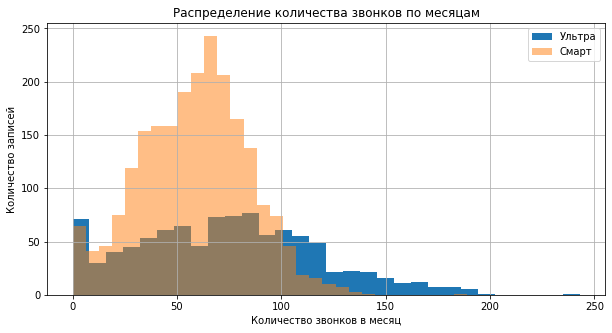

In [146]:
hist = df_ultra[('duration', 'count')].hist(bins=30, figsize=(10,5))
hist.set_xlabel('Количество звонков в месяц')
hist.set_ylabel("Количество записей")
plt.title('Распределение количества звонков по месяцам')
hist = df_smart[('duration', 'count')].hist(bins=30, figsize=(10,5), alpha = 0.5)
plt.legend(['Ультра','Смарт'])
plt.show()

Видим, что пользователи тарифа Ультра совершают большее количество звонков в среднем. В задании требуется найти среднее, стандартное отклонение и дисперсию для двух тарифов.

In [147]:
np.mean(df_ultra[('duration', 'count')]), np.mean(df_smart[('duration', 'count')])

(73.7673469387755, 58.51594072743601)

Ожидаемо среднее к-во звонков больше у Ультра

In [154]:
np.var(df_ultra[('duration', 'count')], ddof=1), np.var(df_smart[('duration', 'count')], ddof=1)

(1901.6209960184276, 667.8239820773478)

In [149]:
np.std(df_ultra[('duration', 'count')], ddof=1), np.std(df_smart[('duration', 'count')], ddof=1)

(43.60757957074008, 25.842290573347938)

Дисперсия и среднеквадратичное отклонение больше у Ультра. Что говорит от том, к-во звонков в Ультра умеет больший разброс относительно среднего.

Построим распределение длительности звонков для абонентов тарифных планов

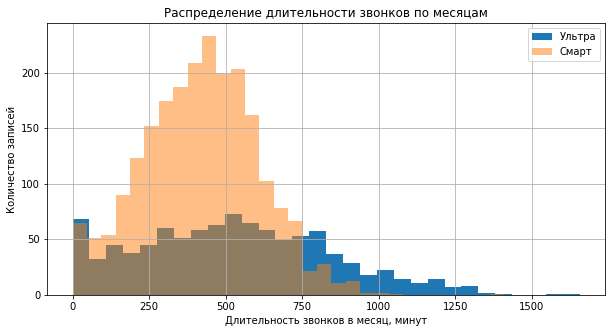

In [150]:
hist = df_ultra[('duration', 'sum')].hist(bins=30, figsize=(10,5))
hist.set_xlabel('Длительность звонков в месяц, минут')
hist.set_ylabel("Количество записей")
plt.title('Распределение длительности звонков по месяцам')
hist = df_smart[('duration', 'sum')].hist(bins=30, figsize=(10,5), alpha = 0.5)
plt.legend(['Ультра','Смарт'])
plt.show()

Посмотрим на основные показатели 

In [151]:
np.mean(df_ultra[('duration', 'sum')]), np.mean(df_smart[('duration', 'sum')])

(529.3102040816326, 418.31028289178266)

Здесь также средний показатель выше у тарифа Ультра

In [152]:
np.var(df_ultra[('duration', 'sum')], ddof=1), np.var(df_smart[('duration', 'sum')], ddof=1)

(99470.83115215442, 35841.333600414095)

In [155]:
np.std(df_ultra[('duration', 'sum')], ddof=1), np.std(df_smart[('duration', 'sum')], ddof=1)

(315.3899667905662, 189.31807520787362)

Видим, что средняя длительность звонков  больше у т.п. Ультра. Разброс также больше у Ультра.

Построим распределение количества сообщений для абонентов тарифных планов

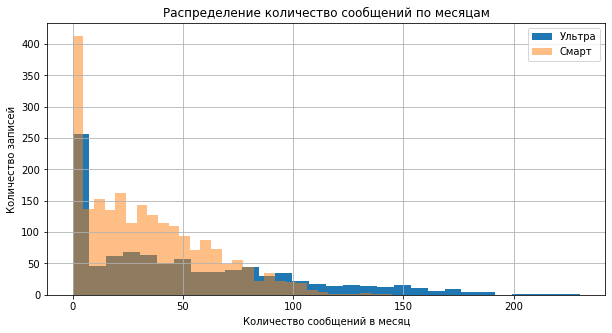

In [156]:
hist = df_ultra['message_count'].hist(bins=30, figsize=(10,5))
hist.set_xlabel('Количество сообщений в месяц')
hist.set_ylabel("Количество записей")
plt.title('Распределение количество сообщений по месяцам')
hist = df_smart['message_count'].hist(bins=30, figsize=(10,5), alpha = 0.5)
plt.legend(['Ультра','Смарт'])
plt.show()

Посмотрим на основные показатели

In [160]:
np.mean(df_ultra['message_count']), np.mean(df_smart['message_count'])

(49.61530612244898, 33.414009878760666)

In [161]:
np.var(df_ultra['message_count']), np.var(df_smart['message_count'])

(2285.144867763432, 789.4657758831534)

In [162]:
np.std(df_ultra['message_count']), np.std(df_smart['message_count'])

(47.80318888697104, 28.09743361738138)

Среднее количество сообщений больше у тарифа Ультра. У него же больше и разброс. Тенденция как и выше

Построим распределение суммарное к-во интернет трафика за месяц. Считаем к-во гигибайт

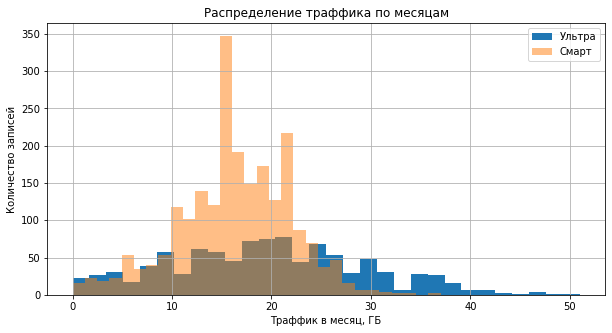

In [163]:
hist = df_ultra['gb_used'].hist(bins=30, figsize=(10,5))
hist.set_xlabel('Траффик в месяц, ГБ')
hist.set_ylabel("Количество записей")
plt.title('Распределение траффика по месяцам')
hist = df_smart['gb_used'].hist(bins=30, figsize=(10,5), alpha = 0.5)
plt.legend(['Ультра','Смарт'])
plt.show()

In [164]:
np.mean(df_ultra['gb_used']), np.mean(df_smart['gb_used'])

(19.581632653061224, 16.333183655141447)

In [165]:
np.var(df_ultra['gb_used']), np.var(df_smart['gb_used'])

(96.26578508954603, 32.00932991822409)

In [166]:
np.std(df_ultra['gb_used']), np.std(df_smart['gb_used'])

(9.811512884848392, 5.657678845447494)

Здесь тенденции аналогичны рассмотренным выше. У тарифного плана Ультра выше средний показатель и выше стандартное отклонение.

<a id='section_4_4'></a>
### Определение выручки от абонента

Определим выручку для тарифных планов по месяцам. Для удобства сделаем названием тарифа индексом

In [168]:
df_tariffs=df_tariffs.set_index('tariff_name')

In [169]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


Определим функцию расчёта выручки от абонента

In [170]:
def income_calc(var):
    tariff = var['tariff']
    current_tariff = df_tarrifs.loc[tariff]
    sum_ = current_tariff['rub_monthly_fee']
    duration_to_pay = (var[('duration', 'sum')]-current_tariff['minutes_included'])*current_tariff['rub_per_minute']
    if duration_to_pay>0:
        sum_+=duration_to_pay
    messages_to_pay = (var['message_count']-current_tariff['messages_included'])*current_tariff['rub_per_message']
    if messages_to_pay>0:
        sum_+=messages_to_pay
    gb_to_pay = np.ceil((var['mb_used']-current_tariff['mb_per_month_included'])/1024)*current_tariff['rub_per_gb']
    if gb_to_pay>0:
        sum_+=gb_to_pay
    return  sum_

Применим функцию расчёта выручки к абонентам т.п. Ультра

In [183]:
df_general.loc[:,'income'] = df_general.apply(income_calc, axis=1)

In [184]:
df_general.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,"(duration, count)","(duration, sum)",message_count,mb_used,gb_used,max_month,income
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1.0,54.0,299.0,63.0,17821.04,18.0,8.0,1950.0
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2.0,46.0,284.0,70.0,18727.60,19.0,8.0,1950.0
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,54.0,403.0,81.0,11440.52,12.0,8.0,1950.0
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,4.0,54.0,470.0,71.0,16078.19,16.0,8.0,1950.0
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,56.0,380.0,59.0,16778.95,17.0,8.0,1950.0


<a id='section_4_5'></a>
### Проверка гипотез

Сформулируем нулевую гипотезу. Средняя выручка абонентов т.п. Ультра и Смарт не отличается. Альтернативная гипотеза - средняя выручка абонентов отличается. Проверим нулевую гипотезу. Считаем, что имеем 2 генеральные совокупности: абоненты Ультра и абоненты Смарт. Импортируем библиотеку.

In [175]:
from scipy import stats as st

Примем значение статистической значимости 0.05

In [179]:
alpha = 0.05

In [187]:
results = st.ttest_ind(df_general[df_general['tariff']=='ultra']['income'], df_general[df_general['tariff']=='smart']['income'])

In [188]:
results.pvalue

3.364324444330259e-170

так как `p-value` получилось меньше уровня статистической значимости (0.05), то отвергаем гипотезу о равенстве средней выручки абонентов т.п. Ультра и Смарт. Значит средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Теперь проверим гипотезу о зависимости выручки от региона. Сформулируем нулевую гипотезу. Средняя выручка абонентов из Москвы и абонентов из других регионов не отличается. Альтернативная гипотеза - средняя выручка абонентов из Москвы и абонентов из других регионов отличается. Проверим нулевую гипотезу

In [189]:
results = st.ttest_ind(df_general[df_general['city']=='Москва']['income'], df_general[df_general['city']!='Москва']['income'])

In [190]:
results.pvalue

0.5898701490853284

Получили, что `p-value` больше порогового значения статистической значимости. Значит не удалось опровергнуть гипотезу о равенстве средней выручки в Москве и регионах.

### Выводы

В ходе анализа данных определили для каждого пользователя по месяцам:
- количество сделанных звоноков
- количество израсходованных минут
- объем интернет-траффика
- количество сообщений

Построили гистограммы вышеуказанных величин для пользователей 2 тарифов и установили:
- среднемесячное количество израсходованных минут больше у тарифа Ультра (529), чем у тарифа Смарт (418)
- среднемесячный объем интернет-траффика также больше у тарифа Ультра (20Гб), чем у Смарт (16Гб)
- среднемесячное количество сообщений  также больше у тарифа Ультра (50), чем у Смарт (33)

Установили, что средняя выручка пользователей тарифов различается. Гипотезу о том, что средняя выручка пользователей Москвы равна выручке пользователей из регионов отвергнуть не смогли.

<a id='section_5'></a>
## Общие выводы

В ходе исследования выполнили предобработку данных, где преобразовали тепы данных и определили месяц для звонков, интернет-сессий и сообщений. Построили гистограммы распределения длительности и к-ва звонков, к-ва сообщений и объёма интернет-сессий для пользователей тарифов "Ультра" и "Смарт". Установили, что у тарифа ультра больше средние показатели для все услуг. Определили выручку с абонента по месяцам. Установили, что средняя выручка пользователей тарифов различается. Гипотезу о том, что средняя выручка пользователей Москвы равна выручке пользователей из регионов отвергнуть не смогли.


